In [2]:
import Bio.SeqIO
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:


flankid_re = re.compile(r"var_(\d+)_(\dp)_flank")
branchid_re = re.compile(r"var_(\d+)_branch_(\d)")
def parse_cortex(cortex_fname):
    cortex_bubbles = []
    with open(cortex_fname) as h:
        for seq in Bio.SeqIO.parse(h, "fasta"):
            mobj = flankid_re.search(seq.id)
            if mobj:
                bubbleno = int(mobj.group(1))
                if bubbleno > len(cortex_bubbles): cortex_bubbles.append([])
                if mobj.group(2) == "5p":
                    cortex_bubbles[-1].append(seq.seq)
                if mobj.group(2) == "3p":
                    cortex_bubbles[-1].append(seq.seq)
            mobj = branchid_re.search(seq.id)
            if mobj:
                cortex_bubbles[-1].append(seq.seq)
    return cortex_bubbles
            
    

In [29]:
sflankstr_re = re.compile(r"Start flank: (\S+) c: (\d+):(\d+)")
branchstr_re = re.compile(r"Branch: (\S+)")
eflankstr_re = re.compile(r"End flank: (\S+)")
def parse_cosmo(cosmo_fname):
    cosmo_bubbles = []
    with open(cosmo_fname) as h:
        for line in h:
            mobj = sflankstr_re.search(line)
            if mobj:
                cosmo_bubbles.append([Bio.Seq.Seq(mobj.group(1))])
            mobj = branchstr_re.search(line)
            if mobj:
                cosmo_bubbles[-1].append(Bio.Seq.Seq(mobj.group(1)))
            mobj = eflankstr_re.search(line)
            if mobj:
                cosmo_bubbles[-1].append(Bio.Seq.Seq(mobj.group(1)))
    return cosmo_bubbles


In [35]:
def diff(cortex_bubbles, cosmo_bubbles, kmer_size):
    cosmo_starts = {seq[0][-kmer_size:] for seq in cosmo_bubbles}  

    missing_bubbles = []
    found_bubbles = []
    for bubble in cortex_bubbles:
        qseq = bubble[0]
        eqseq = bubble[3]
        if str(qseq[-kmer_size:]) not in cosmo_starts and str(eqseq[:kmer_size].reverse_complement()) not in cosmo_starts:
            missing_bubbles.append(bubble)
        else:
            found_bubbles.append(bubble)
    return found_bubbles, missing_bubbles


In [100]:
%%time

plants_dir = "/s/chopin/h/proj/soma/cdbg/plants/"

cortex_outfile = "bubbles_cortex.txt"
cosmo_outfile = "cosmo-color.martin.bovine-opt.stdout"

cortex_bubbles = parse_cortex(plants_dir + cortex_outfile)
cosmo_bubbles = parse_cosmo(plants_dir + cosmo_outfile)
found_bubbles, missing_bubbles = diff(cortex_bubbles, cosmo_bubbles)
len(missing_bubbles), len(found_bubbles)

CPU times: user 55.9 s, sys: 3.67 s, total: 59.6 s
Wall time: 59.9 s


In [102]:
len(missing_bubbles), len(found_bubbles)

(50026, 407603)

[51, 76, 32, 32, 67, 59, 32]


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 32.        ,  33.46666667,  34.93333333,  36.4       ,
         37.86666667,  39.33333333,  40.8       ,  42.26666667,
         43.73333333,  45.2       ,  46.66666667,  48.13333333,
         49.6       ,  51.06666667,  52.53333333,  54.        ,
         55.46666667,  56.93333333,  58.4       ,  59.86666667,
         61.33333333,  62.8       ,  64.26666667,  65.73333333,
         67.2       ,  68.66666667,  70.13333333,  71.6       ,
         73.06666667,  74.53333333,  76.        ]),
 <a list of 30 Patch objects>)

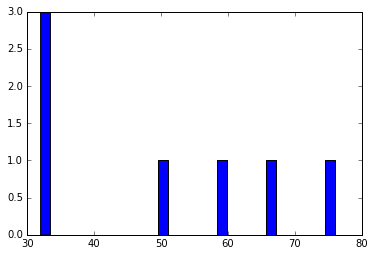

In [114]:
flanking_supernode_lengths =[y for y in (min(len(x[1]) , len(x[2])) for x in missing_bubbles )]
print(flanking_supernode_lengths)
plt.hist(flanking_supernode_lengths, bins=30)

In [34]:
len([x for x in missing_lengths if x == 32])

48421

In [38]:
missing_bubbles[2]

[SeqRecord(seq=Seq('CTCTTACGGGGCAGGGCGTTACGGTCATGC', SingleLetterAlphabet()), id='var_46_5p_flank', name='var_46_5p_flank', description='var_46_5p_flank length:32 INFO:KMER=31', dbxrefs=[]),
 SeqRecord(seq=Seq('ACTTTAATATCTATTCATGAGCTCACTAGAGA', SingleLetterAlphabet()), id='var_46_branch_1', name='var_46_branch_1', description='var_46_branch_1 length:32 kmer:31', dbxrefs=[]),
 SeqRecord(seq=Seq('TCTTTAATATCTATTCATGAGCTCACTAGAGA', SingleLetterAlphabet()), id='var_46_branch_2', name='var_46_branch_2', description='var_46_branch_2 length:32 kmer:31', dbxrefs=[]),
 SeqRecord(seq=Seq('G', SingleLetterAlphabet()), id='var_46_3p_flank', name='var_46_3p_flank', description='var_46_3p_flank length:1 kmer:31', dbxrefs=[])]

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  96543.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.]),
 array([ 29.5       ,  29.53333333,  29.56666667,  29.6       ,
         29.63333333,  29.66666667,  29.7       ,  29.73333333,
         29.76666667,  29.8       ,  29.83333333,  29.86666667,
         29.9       ,  29.93333333,  29.96666667,  30.        ,
         30.03333333,  30.06666667,  30.1       ,  30.13333333,
         30.16666667,  30.2       ,  30.23333333,  30.26666667,
         30.3       ,  30.33333333,  30.36666667,  30.4       ,
         30.43333333,  30.46666667,  30.5       ]),
 <a list of 30 Patch objects>)

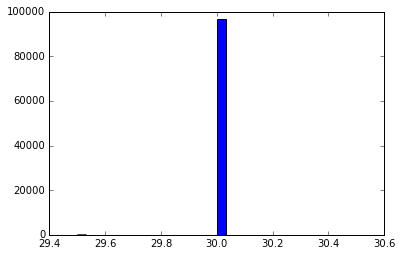

In [62]:
plt.hist([len(x[3]) for x in cortex_bubbles if len(x[3]) ==30], bins=30)

In [47]:
len([len(x[1]) for x in found_bubbles if len(x[1]) ==33 and len(x[2]) == 33])

5506

In [13]:
cortex_bubbles = parse_cortex("ecoli/bubbles_cortex.txt")
#cortex_bubbles = parse_cortex("ecoli/bubbles29.fasta")
cosmo_bubbles = parse_cosmo("ecoli/cosmo-color.stdout.martin")
cosmo_bubbles2 = parse_cosmo("ecoli/cosmo-color-kmc4.stdout")
cosmo_bubbles3 = parse_cosmo("ecoli/refactored.stdout")
found_bubbles, missing_bubbles = diff(cortex_bubbles, cosmo_bubbles2, 30)
len(missing_bubbles), len(found_bubbles)

/s/chopin/l/grad/muggli/py3.5env/lib/python3.5/site-packages/Bio/Seq.py:152: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


(4, 461)

In [124]:
'","'.join([str(x[0][-30:].seq) for x in missing_bubbles])

'GCCATACTGCGTCATGTCGCCCTGACGCGC","GCAGGTTCGAATCCTGCACGACCCACCAAT","GCTTAACCTCACAACCCGAAGATGTTTCTT","AAAACCCGCCGAAGCGGGTTTTTACGTAAA","AATCCTGCACGACCCACCAGTTTTAACATC","AGAGTTCCCCGCGCCAGCGGGGATAAACCG","GAATACGTGCGCAACAACCGTCTTCCGGAG'

In [52]:
[x[0] for x in cortex_bubbles if len(x[0]) == 31]

[Seq('TTTACGTAAAAACCCGCTTCGGCGGGTTTTT', SingleLetterAlphabet()),
 Seq('AAAAACCCGCCGAAGCGGGTTTTTACGTAAA', SingleLetterAlphabet()),
 Seq('CAGAGTTCCCCGCGCCAGCGGGGATAAACCG', SingleLetterAlphabet())]

In [10]:
len(cosmo_bubbles3
)

933